
Простейшая расстановка центров кластеров:
  Смещение (bias): -0.058
  Веса (weights): [0.224588, -0.00511071]
  Классификация:
    Истинный класс: 1, Предсказанный класс: 1
    Истинный класс: 1, Предсказанный класс: 1
    Истинный класс: 2, Предсказанный класс: 2
    Истинный класс: 2, Предсказанный класс: 2


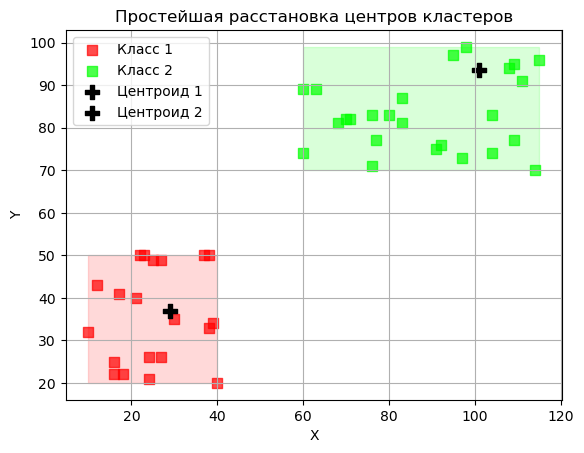


Метод простеивания:
  Смещение (bias): -0.058
  Веса (weights): [0.224588, -0.00511071]
  Классификация:
    Истинный класс: 1, Предсказанный класс: 1
    Истинный класс: 1, Предсказанный класс: 1
    Истинный класс: 2, Предсказанный класс: 2
    Истинный класс: 2, Предсказанный класс: 2


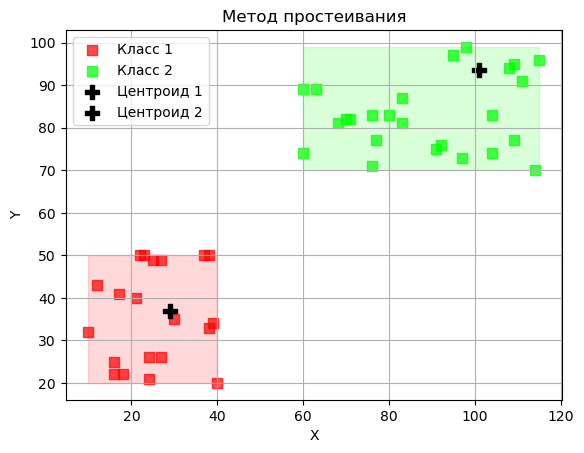


Максиминное растрояние:
  Смещение (bias): -0.058
  Веса (weights): [0.224588, -0.00511071]
  Классификация:
    Истинный класс: 1, Предсказанный класс: 1
    Истинный класс: 1, Предсказанный класс: 1
    Истинный класс: 2, Предсказанный класс: 2
    Истинный класс: 2, Предсказанный класс: 2


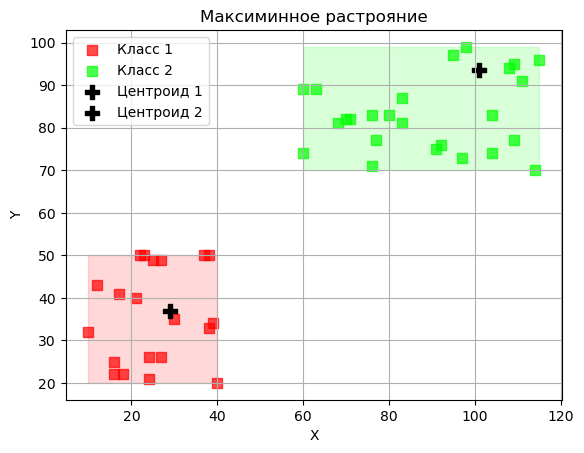

In [8]:
import matplotlib.pyplot as plt
import numpy as np

def Read_Data():
    with open('new_data.txt', 'r') as file:
        lines = file.readlines()
        
    data = []
    for i in range(0, len(lines), 3):
        if i + 1 < len(lines) and i + 2 < len(lines): #Added this check to prevent IndexError
            x_coords = list(map(float, lines[i].strip().split()))
            y_coords = list(map(float, lines[i + 1].strip().split()))
            data.append((x_coords, y_coords))
    
    return data

def read_centroids(filename):
    centroids = []
    try:
        with open(filename, 'r') as file:
            for line in file:
                coords = list(map(float, line.strip().split()))
                centroids.append(coords)
    except FileNotFoundError:
        print(f"Warning: File '{filename}' not found. Skipping.")
        return []
    return centroids

def read_perceptron_weights(filename):
    """Считывает веса и смещение перцептрона из файла."""
    try:
        with open(filename, 'r') as f:
            lines = f.readlines()
            bias = float(lines[0].strip())
            weights = list(map(float, lines[1].strip().split()))
            return bias, weights
    except FileNotFoundError:
        print(f"Warning: File '{filename}' not found. Skipping.")
        return None, None
    except (IndexError, ValueError):
        print(f"Warning: Invalid format in '{filename}'. Skipping.")
        return None, None


def read_perceptron_classification(filename):
    """Считывает классификацию перцептрона из файла."""
    try:
        with open(filename, 'r') as f:
            classifications = []
            for line in f:
                true_label, predicted_label = map(int, line.strip().split())
                classifications.append((true_label, predicted_label))
            return classifications
    except FileNotFoundError:
        print(f"Warning: File '{filename}' not found. Skipping.")
        return []
    except ValueError:
        print(f"Warning: Invalid format in '{filename}'. Skipping.")
        return []

def plot_data_and_perceptron(data_points, centroids_list, title, bias, weights, classifications):
    colors = [
        "#FF0000",
        "#00FF00",
        "#0000FF",
        "#FFFF00",
        "#FFA500",
        "#00FFFF",
        "#800080",
        "#008080",
        "#808080"
    ]

    # Построение точек данных
    for i, (x, y) in enumerate(data_points):
        plt.scatter(x, y, color=colors[i % len(colors)], label=f'Класс {i + 1}', s=50, marker='s', alpha=0.7)
        plt.fill([min(x), max(x), max(x), min(x), min(x)], [min(y), min(y), max(y), max(y), min(y)],
                 color=colors[i % len(colors)], alpha=0.15)


    # Построение центроидов
    for i, centroids in enumerate(centroids_list):
        for j, centroid in enumerate(centroids):
            plt.scatter(centroid[0], centroid[1], marker='P', color='black', s=100, label=f'Центроид {j+1}')


    # Находим границы графика для корректной инверсии
    min_x = min([min(x) for x, _ in data_points])
    max_x = max([max(x) for x, _ in data_points])
    min_y = min([min(y) for _, y in data_points])
    max_y = max([max(y) for _, y in data_points])

    print(f"\n{title}:")
    print(f"  Смещение (bias): {bias}")
    print(f"  Веса (weights): {weights}")
    print("  Классификация:")
    for true_label, predicted_label in classifications:
        print(f"    Истинный класс: {true_label}, Предсказанный класс: {predicted_label}")

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = dict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    data = Read_Data()
    centroids_simple = read_centroids("simple_centroids.txt")
    centroids_sieve = read_centroids("sieve_centroids.txt")
    centroids_maxmin = read_centroids("maxmin_centroids.txt")

    bias, weights = read_perceptron_weights("perceptron_weights.txt")
    classifications = read_perceptron_classification("perceptron_classification.txt")

    plot_data_and_perceptron(data, [centroids_simple], "Простейшая расстановка центров кластеров", bias, weights, classifications)
    plot_data_and_perceptron(data, [centroids_sieve], "Метод простеивания", bias, weights, classifications)
    plot_data_and_perceptron(data, [centroids_maxmin], "Максиминное растрояние", bias, weights, classifications)